RIDGE REGRESSION 
CODE FOR SCRATCH

In [2]:
from sklearn.datasets import make_regression
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
x,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

In [4]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [6]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=10)
rr.fit(x,y)
print(rr.coef_)
print(rr.intercept_)

rr1=Ridge(alpha=100)
rr1.fit(x,y)
print(rr1.coef_)
print(rr1.intercept_)

[24.9546267]
-2.1269130035235735
[12.93442104]
-1.4248441496033308


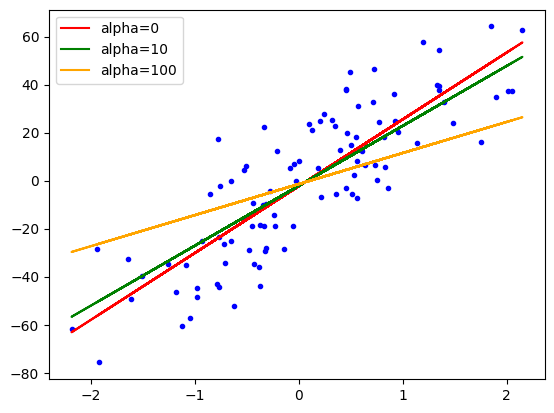

In [7]:
plt.plot(x,y,'b.')
plt.plot(x,lr.predict(x),color='red',label='alpha=0')
plt.plot(x,rr.predict(x),color='green',label='alpha=10')
plt.plot(x,rr1.predict(x),color='orange',label='alpha=100')
plt.legend()

code from scratch

In [10]:
class MeraRidge:
    def __init__(self,alpha=10):
        self.aplha=alpha
        self.m=None
        self.b=None
    
    def fit(self,x_train,y_train):
        num=0
        den=0
        for i in range(x_train.shape[0]):
            num=num+(y_train[i]-y_train.mean())*(x_train[i]-x_train.mean())
            den=den+(x_train[i]-x_train.mean())*(x_train[i]-x_train.mean())

        self.m=num/(den+self.aplha)
        self.b=y_train.mean()-self.m*x_train.mean()
        print(self.m)
        print(self.b)

    def predict(self,x_test):
        return self.m*x_test+self.b

In [11]:
reg=MeraRidge()
reg.fit(x,y)

[24.9546267]
[-2.126913]


ridge regression fir n dim 

In [14]:
from sklearn.datasets import load_diabetes
x1,y1=load_diabetes(return_X_y=True)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=4)

In [24]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
rid=Ridge(alpha=10)
rid.fit(x_train,y_train)
y_pred=rid.predict(x_test)
r2_score(y_test,y_pred)


0.1586550730031001

In [25]:
print(rid.coef_)
print(rid.intercept_)

[ 19.73816861  -2.31650264  62.15929363  49.54602923  18.92716443
  12.45739602 -39.60091202  42.81978891  61.57115822  35.24731451]
151.60854821587688


In [26]:
class MeraRidgeN:
    def __init__(self,alpha=0.1):
        self.aplha=alpha
        self.coef_=None
        self.intercept_=None

    def fit(self,x_train,y_train):
        x_train=np.insert(x_train,0,1,axis=1)
        I=np.identity(x_train.shape[1])
        I[0][0]=0

        result=np.linalg.inv(np.dot(x_train.T,x_train)+self.aplha*I).dot(x_train.T).dot(y_train)

        self.coef_=result[1:]
        self.intercept_=result[0]
        print(self.coef_)
        print(self.intercept_)

    def predict(self,x_test):
        return np.dot(x_test,self.coef_)+self.intercept_

In [28]:
reg1=MeraRidgeN(alpha=10)
reg1.fit(x_train,y_train)
y_pred=reg1.predict(x_test)


[ 19.73816861  -2.31650264  62.15929363  49.54602923  18.92716443
  12.45739602 -39.60091202  42.81978891  61.57115822  35.24731451]
151.60854821587688
